In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv('/content/players.csv',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [7]:
df = df[['short_name','long_name','player_positions','overall','potential','value_eur','wage_eur','age','club_name','league_name','league_level','club_position','nationality_name','release_clause_eur']]


In [8]:
df.head()

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,release_clause_eur
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,FC Barcelona,Spain Primera Division,1.0,CAM,Argentina,138400000.0
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,Juventus,Italian Serie A,1.0,LS,Portugal,75900000.0
2,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,132000000.0
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,Paris Saint-Germain,French Ligue 1,1.0,LW,Brazil,166500000.0
4,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,Manchester City,English Premier League,1.0,RCM,Belgium,161000000.0


In [9]:
df = df.dropna()

In [10]:
df.describe()

,overall,potential,value_eur,wage_eur,age,league_level,release_clause_eur
count,17949.000000,17949.000000,1.794900e+04,17949.000000,17949.000000,17949.000000,1.794900e+04
mean,65.623266,70.987130,2.923011e+06,9070.145969,25.245696,1.349100,4.296353e+06
std,7.056683,6.126608,7.867195e+06,20052.923397,4.690882,0.733276,1.005968e+07
min,47.000000,47.000000,9.000000e+03,500.000000,16.000000,1.000000,9.000000e+03
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,1.000000,5.250000e+05
50%,66.000000,71.000000,9.500000e+05,3000.000000,25.000000,1.000000,1.100000e+06
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,1.000000,3.200000e+06
max,93.000000,95.000000,1.855000e+08,560000.000000,43.000000,4.000000,2.031000e+08


In [11]:
hist_data = [df['overall']]
hist_data

[0        93
 1        92
 2        91
 3        91
 4        91
          ..
 18939    47
 18940    47
 18941    47
 18942    47
 18943    47
 Name: overall, Length: 17949, dtype: int64]

In [12]:
group_labels = ['hist_data']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, curve_type='normal', bin_size=0.5, show_rug=False)
fig.show()

In [13]:
hist_data = [df['age']]
group_labels = ['hist_data']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, curve_type='normal', bin_size=0.5, show_rug=False)
fig.show()

In [14]:
hist_data = [df['wage_eur']]
group_labels = ['hist_data']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, curve_type='normal', bin_size=0.5, show_rug=False)
fig.show()

Normal distribution shows the most accurate distribution of data around its mean. On comparing the value at tip and the value given by pandas describe function, I realized that they are same. Which verifies that mean is at peak in normal distribution.

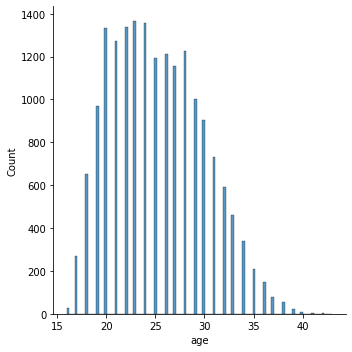

In [15]:
sns.displot(df['age'],bins=100)

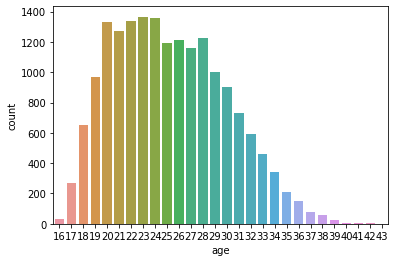

In [16]:
sns.countplot(x = df['age'],data = df)

In [17]:
df.corr()

,overall,potential,value_eur,wage_eur,age,league_level,release_clause_eur
overall,1.000000,0.641191,0.558074,0.591625,0.473104,-0.210423,0.626277
potential,0.641191,1.000000,0.539652,0.491453,-0.252461,-0.177194,0.587108
value_eur,0.558074,0.539652,1.000000,0.813059,0.043275,-0.120507,0.978579
wage_eur,0.591625,0.491453,0.813059,1.000000,0.165314,-0.137220,0.842814
age,0.473104,-0.252461,0.043275,0.165314,1.000000,-0.060379,0.071333
league_level,-0.210423,-0.177194,-0.120507,-0.137220,-0.060379,1.000000,-0.140492
release_clause_eur,0.626277,0.587108,0.978579,0.842814,0.071333,-0.140492,1.000000


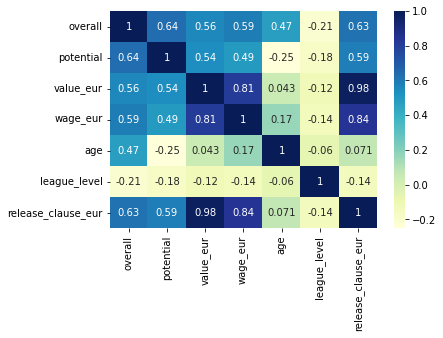

In [18]:
dfplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [19]:
from scipy.stats import skewtest,skew
print(skew(df['age'], axis=0, bias=True))
print(skewtest(df['potential']))

0.3719327965080013
SkewtestResult(statistic=13.286606200722193, pvalue=2.7685318341096667e-40)


In [20]:
from scipy.stats import ttest_1samp

In [21]:
ttest,pvalue = ttest_1samp(df['wage_eur'],8500)
pvalue

0.00013990786049815658

In [22]:
if pvalue >0.1:
  print("Non significant evidence against H0")
elif pvalue > 0.05 and pvalue <= 0.1:
  print("Marginally significant evidence against H0") 
elif pvalue > 0.01 and pvalue <= 0.05:
  print("Significant evidence against H0") 
else:
  print("Highly significant evidence against H0")

Highly significant evidence against H0


In [23]:
ttest,pvalue = ttest_1samp(df['release_clause_eur'],4.23e+06)
pvalue

0.37687889813649433

In [24]:
pvalue

0.37687889813649433

In [25]:
if pvalue >0.1:
  print("Non significant evidence against H0")
elif pvalue > 0.05 and pvalue <= 0.1:
  print("Marginally significant evidence against H0") 
elif pvalue > 0.01 and pvalue <= 0.05:
  print("Significant evidence against H0") 
else:
  print("Highly significant evidence against H0")

Non significant evidence against H0


In [26]:
print('\n\noverall\n', df['overall'].mode())
print('\n\npotential\n', df['potential'].mode())
print('\n\nvalue_eur\n', df['value_eur'].mode())
print('\n\nwage_eur\n', df['wage_eur'].mode())
print('\n\nrelease_clause_eur\n', df['release_clause_eur'].mode())
# print('\n\nCost Per Month - Premium ($)\n', df['Cost Per Month - Premium ($)'].mode())



overall
 0    65
dtype: int64


potential
 0    70
dtype: int64


value_eur
 0    1200000.0
dtype: float64


wage_eur
 0    2000.0
dtype: float64


release_clause_eur
 0    1100000.0
dtype: float64


Above is the mode of each attribute, showing values with highest frequencies in their respective columns.

##Solution to example given in the document

Given data:
n = 10 
x-bar = 27
variance = 20
H0: u0 = 30
Ha: ua != 30
alpha = 0.05

Solution:
As variance is given, I'll perform z-test to test the hypothesis by getting standard deviation:

SE = sqrt(variance)/sqrt(n) = sqrt(20)/sqrt(10) = 1.414
zstat = (x-bar - u0)/SE = (-3)/1.414 = -2.122
Therefore, p-value = 0.033838
as, p-value is between 0.01 and 0.05, we have significant evidence against H0.
As, p-value: 0.033838 is lesseer than alpha: 0.05, we will reject the null hypothesis.

##To check whether u < 30

H0: u0 = 30
Ha: ua < 30
alpha = 0.05

Solution:
SE = sqrt(variance)/sqrt(n) = sqrt(20)/sqrt(10) = 1.414
zstat = (x-bar - u0)/SE = (-3)/1.414 = -2.122
As this is a left tailed test,
We need to check whether Zstat < -Zalpha
If true, we reject H0 else we retain it.
Here, Zalpha = -1.645
As, Zstat: -2.122 < -Zalpha: -1.645
Therefore, we reject null hypothesis and hold u < 30 as True.